# Simplex Algorithm

Steps:

1. Convert the equations and constraints to **standard form**; add **slack variables**.

2. Set initial simplex **tableau** using the objective function and **slack variables**. We write the objective at the bottom row.

3. Optimizing simplex by **pivoting operations**. The most neg entry in bottom row determines pivot col. Calculate the quotients(*dividing entries in far right col by identified pivot col excluding the bottom row*). The row with smallest quotient denotes pivot row. The intersection of pivot row and pivot col denotes the **pivot element**. This pivoting will help us to convert our augmented matrix to *row echolon form*.

4. This pivoting will continue until there is no negative values for last row.

5. After we get the ***optimal simplex tableau***, we identify our optiml solutions from it.

**Note:** a. If the quotient is negative for all the rows, then then there is no solution.

b. If there is no echolon form (only single input 1 and others 0 for than column) for a paticular variable in the final tableau, we will consider its value as 0.

In [1]:
#tab -> initial tableau matrix
#len_vars-> number of variables

function simplex(tab,len_vars)
    red_flag=false
    display(tab)
    println("-------------------------------------")
    while findmin(tab[end,:])[1]<0
      i2=findmin(tab[end,:])[1]
      pivot_r=i2
      global list_fr_row=Any[]
      ind_col=findall(x->x==pivot_r, tab[end,:])[1][1]
      foo=zip(tab[1:end-1,ind_col],tab[1:end-1,end])
      for kC in foo
         k=kC[1]
         C=kC[2]
         if k!=0
            a2=C/k
            push!(list_fr_row,a2)
         end
      end
      if findmax(list_fr_row)[1]<0
         red_flag=true
    
      end
      min_row= findmin(list_fr_row)[2]
      for i in 1:size(tab)[1]
         if tab[min_row,ind_col]!=0 && i!=min_row
            to_mul=tab[i,ind_col]/tab[min_row,ind_col]
            #print("to_mul",to_mul)
            #println("--w",tab[i,:])
            tab[i,:]-=tab[min_row,:]*to_mul
         end
      end
      tab[min_row,:]=tab[min_row,:]/tab[min_row,ind_col]
      if red_flag==false
        display(tab)
        println("-------------------------------------")
      else
          break
      end
    end
    
    cols_final = Dict{String, Float16}()
    if red_flag==false
       for i in 1:len_vars
            if sum(tab[:,i])==1
            cols_final[string(i-1)]=tab[findall(pivot_r->pivot_r==1, tab[:,i])[1][1],end]
            else
                cols_final[string(i-1)]=0
            end
       end
       cols_final["Z"]=tab[end,end]
       println(cols_final)
    else
       println("No Solution")
       #cols_final["Status"]="No Solution"
       cols_final="No Solution because of negative ratios: "*string(list_fr_row)
    end
    return tab,cols_final
end

simplex (generic function with 1 method)

# Question1

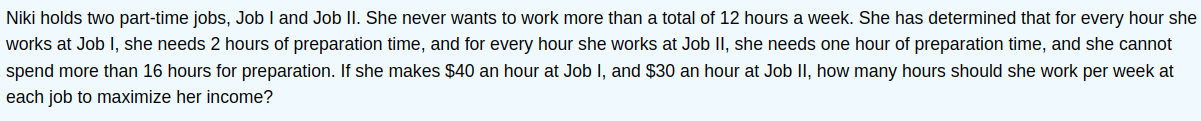

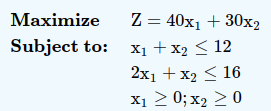

Solution:

Standard Form:

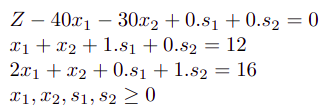

Initial Tableau Matrix:

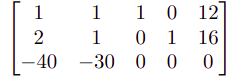

In [2]:
tab=[1.0 1 1 0 12; 2 1 0 1 16; -40 -30 0 0 0];
len_vars=2;
tab,cols_final=simplex(tab,len_vars);

3×5 Matrix{Float64}:
   1.0    1.0  1.0  0.0  12.0
   2.0    1.0  0.0  1.0  16.0
 -40.0  -30.0  0.0  0.0   0.0

-------------------------------------


3×5 Matrix{Float64}:
 0.0    0.5  1.0  -0.5    4.0
 1.0    0.5  0.0   0.5    8.0
 0.0  -10.0  0.0  20.0  320.0

-------------------------------------


3×5 Matrix{Float64}:
 0.0  1.0   2.0  -1.0    8.0
 1.0  0.0  -1.0   1.0    4.0
 0.0  0.0  20.0  10.0  400.0

-------------------------------------
Dict{String, Float16}("Z" => 400.0, "1" => 8.0, "0" => 4.0)


In [3]:
tab

3×5 Matrix{Float64}:
 0.0  1.0   2.0  -1.0    8.0
 1.0  0.0  -1.0   1.0    4.0
 0.0  0.0  20.0  10.0  400.0

In [4]:
cols_final

Dict{String, Float16} with 3 entries:
  "Z" => 400.0
  "1" => 8.0
  "0" => 4.0

The final matrix in the output represents the optimal tableau matrix.
The final solution is 0 or **$x_1$=4**, 1 or **$x_2$=8** and objective function **$Z$=400**

If Niki works 4 hrs at Job1 and 8 hrs in Job2 then she can maximize her income to $400.

# Question2

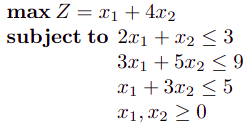

The standard form and initial tableau matrix:

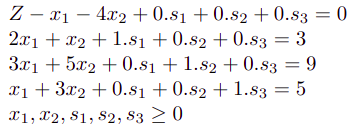

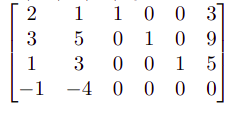

In [5]:
#tab=np.array([[2,1,1,0,0,3],[3,5,0,1,0,9],[1,3,0,0,1,5],[-1,-4,0,0,0,0]],dtype='float64')
tab=[2.0 1 1 0 0 3; 3 5 0 1 0 9; 1 3 0 0 1 5; -1 -4 0 0 0 0]
len_vars=2
tab,cols_final=simplex(tab,len_vars);

4×6 Matrix{Float64}:
  2.0   1.0  1.0  0.0  0.0  3.0
  3.0   5.0  0.0  1.0  0.0  9.0
  1.0   3.0  0.0  0.0  1.0  5.0
 -1.0  -4.0  0.0  0.0  0.0  0.0

-------------------------------------


4×6 Matrix{Float64}:
 1.66667   0.0  1.0  0.0  -0.333333  1.33333
 1.33333   0.0  0.0  1.0  -1.66667   0.666667
 0.333333  1.0  0.0  0.0   0.333333  1.66667
 0.333333  0.0  0.0  0.0   1.33333   6.66667

-------------------------------------
Dict{String, Float16}("Z" => 6.668, "1" => 1.667, "0" => 0.0)


In [6]:
tab

4×6 Matrix{Float64}:
 1.66667   0.0  1.0  0.0  -0.333333  1.33333
 1.33333   0.0  0.0  1.0  -1.66667   0.666667
 0.333333  1.0  0.0  0.0   0.333333  1.66667
 0.333333  0.0  0.0  0.0   1.33333   6.66667

In [7]:
cols_final

Dict{String, Float16} with 3 entries:
  "Z" => 6.668
  "1" => 1.667
  "0" => 0.0

$x_1$=0, $x_2$=1.67 and $Z$=6.67

# Question3

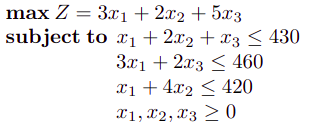

The standard form and initial augmented matrix:

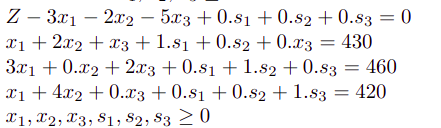

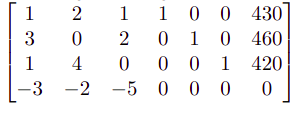

In [8]:
##tab=np.array([[1,2,1,1,0,0,430],[3,0,2,0,1,0,460],[1,4,0,0,0,1,420],[-3,-2,-5,0,0,0,0]],dtype='float64')
tab=[1.0 2 1 1 0 0 430; 3 0 2 0 1 0 460; 1 4 0 0 0 1 420; -3 -2 -5 0 0 0 0]
len_vars=3
tab,cols_final=simplex(tab,len_vars);

4×7 Matrix{Float64}:
  1.0   2.0   1.0  1.0  0.0  0.0  430.0
  3.0   0.0   2.0  0.0  1.0  0.0  460.0
  1.0   4.0   0.0  0.0  0.0  1.0  420.0
 -3.0  -2.0  -5.0  0.0  0.0  0.0    0.0

-------------------------------------


4×7 Matrix{Float64}:
 -0.5   2.0  0.0  1.0  -0.5  0.0   200.0
  1.5   0.0  1.0  0.0   0.5  0.0   230.0
  1.0   4.0  0.0  0.0   0.0  1.0   420.0
  4.5  -2.0  0.0  0.0   2.5  0.0  1150.0

-------------------------------------


4×7 Matrix{Float64}:
 -0.25  1.0  0.0   0.5  -0.25  0.0   100.0
  1.5   0.0  1.0   0.0   0.5   0.0   230.0
  2.0   0.0  0.0  -2.0   1.0   1.0    20.0
  4.0   0.0  0.0   1.0   2.0   0.0  1350.0

-------------------------------------
Dict{String, Float16}("Z" => 1.35e3, "1" => 100.0, "0" => 0.0, "2" => 230.0)


In [9]:
tab

4×7 Matrix{Float64}:
 -0.25  1.0  0.0   0.5  -0.25  0.0   100.0
  1.5   0.0  1.0   0.0   0.5   0.0   230.0
  2.0   0.0  0.0  -2.0   1.0   1.0    20.0
  4.0   0.0  0.0   1.0   2.0   0.0  1350.0

In [10]:
cols_final

Dict{String, Float16} with 4 entries:
  "Z" => 1.35e3
  "1" => 100.0
  "0" => 0.0
  "2" => 230.0

$x_1$=0, $x_2$=100, $x_3$=230, $Z$=1350

# Question4 

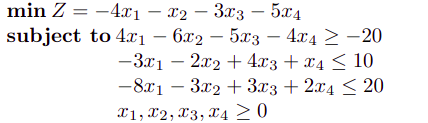

Can also be written as:

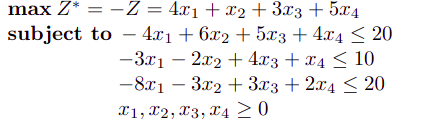



Standard form and initial tableu matrix:

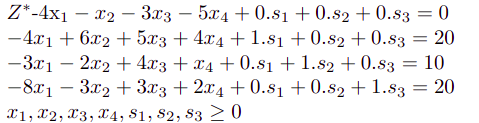

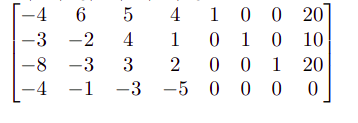

In [11]:
#tab=np.array([[-4,6,5,4,1,0,0,20],[-3,-2,4,1,0,1,0,10],[-8,-3,3,2,0,0,1,20],[-4,-1,-3,-5,0,0,0,0]],dtype='float64')
tab=[-4 6.0 5 4 1 0 0 20; -3 -2 4 1 0 1 0 10; -8 -3 3 2 0 0 1 20; -4 -1 -3 -5 0 0 0 0]
len_vars=4
tab,cols_final=simplex(tab,len_vars);

4×8 Matrix{Float64}:
 -4.0   6.0   5.0   4.0  1.0  0.0  0.0  20.0
 -3.0  -2.0   4.0   1.0  0.0  1.0  0.0  10.0
 -8.0  -3.0   3.0   2.0  0.0  0.0  1.0  20.0
 -4.0  -1.0  -3.0  -5.0  0.0  0.0  0.0   0.0

-------------------------------------


4×8 Matrix{Float64}:
 -1.0   1.5  1.25  1.0   0.25  0.0  0.0   5.0
 -2.0  -3.5  2.75  0.0  -0.25  1.0  0.0   5.0
 -6.0  -6.0  0.5   0.0  -0.5   0.0  1.0  10.0
 -9.0   6.5  3.25  0.0   1.25  0.0  0.0  25.0

-------------------------------------
No Solution


In [12]:
cols_final

"No Solution because of negative ratios: Any[-5.0, -2.5, -1.6666666666666667]"

**No solution**.